# Лабораторная работа 3. Описательная статистика


## Ваши данные
Заполните следующую информацию:

*Имя: Екатерина
*Фамилия:Макарова
*Электронная почта:makarovakatya0237@gmail.com



In [1]:
# imports and setup
import pandas as pd
import scipy as sc
import numpy as np

from scipy.stats import norm
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20, 6)

%matplotlib inline
plt.style.context('ggplot')

## Часть 3.1: Индекс качества воздуха SLC

В этой задаче изучить качество воздуха в Солт-Лейк-Сити.

### Задача 3.1.0. Узнайте об AQI

Прочтите об [индексе качества воздуха (AQI)](https://www.airnow.gov/aqi/aqi-basics) и
Система [AirNow](https://www.airnow.gov/about-airnow).


### Задача 3.1.1. Скачать данные
Агентство по охране окружающей среды предоставляет доступ к данным о качестве воздуха на веб-сайте AirData. Прочтите о данных, доступных на [этой информационной странице] (https://www.epa.gov/outdoor-air-quality-data/air-data-basic-information). Или скачайте файл `ad_viz_plotval_data.csv` в каталоге задания.


Перейдите на [website] (https://www.epa.gov/outdoor-air-quality-data/download-daily-data) и загрузите следующие ежедневные данные:

+ Pollutant = PM2.5
+ Year = 2023
+ City = Salt Lake City, UT
+ Monitor Site = All Sites

### Задача 3.1.2. Импорт данных. Предобработка данных
Используйте функцию `pandas.read_csv()` для импорта данных.

Предупреждение: эти данные не соответствуют критериям качетсва:

+ Даты не сортируются.
+ Некоторые даты могут иметь пропущенные значения.
+ Некоторые даты могут иметь несколько значений, соответствующих разным датчикам (POC=1,2,3,4,5).

In [2]:
from google.colab import files
uploaded = files.upload()

Saving ad_viz_plotval_data.csv to ad_viz_plotval_data.csv


In [3]:
df=pd.read_csv('ad_viz_plotval_data.csv')
df.head()

,Date,Source,Site ID,POC,Daily Mean PM2.5 Concentration,UNITS,DAILY_AQI_VALUE,Site Name,DAILY_OBS_COUNT,PERCENT_COMPLETE,AQS_PARAMETER_CODE,AQS_PARAMETER_DESC,CBSA_CODE,CBSA_NAME,STATE_CODE,STATE,COUNTY_CODE,COUNTY,SITE_LATITUDE,SITE_LONGITUDE
0,01/01/2023,AQS,490352005,1,4.6,ug/m3 LC,19,Copper View,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.598056,-111.894167
1,01/02/2023,AQS,490352005,1,4.0,ug/m3 LC,17,Copper View,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.598056,-111.894167
2,01/03/2023,AQS,490352005,1,12.5,ug/m3 LC,52,Copper View,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.598056,-111.894167
3,01/04/2023,AQS,490352005,1,9.9,ug/m3 LC,41,Copper View,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.598056,-111.894167
4,01/05/2023,AQS,490352005,1,2.2,ug/m3 LC,9,Copper View,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.598056,-111.894167


In [4]:
rows_count = len(df)
print(rows_count)

6514


In [5]:
df.info() #Проверка типов данных стобцов

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6514 entries, 0 to 6513
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Date                            6514 non-null   object 
 1   Source                          6514 non-null   object 
 2   Site ID                         6514 non-null   int64  
 3   POC                             6514 non-null   int64  
 4   Daily Mean PM2.5 Concentration  6514 non-null   float64
 5   UNITS                           6514 non-null   object 
 6   DAILY_AQI_VALUE                 6514 non-null   int64  
 7   Site Name                       6514 non-null   object 
 8   DAILY_OBS_COUNT                 6514 non-null   int64  
 9   PERCENT_COMPLETE                6514 non-null   float64
 10  AQS_PARAMETER_CODE              6514 non-null   int64  
 11  AQS_PARAMETER_DESC              6514 non-null   object 
 12  CBSA_CODE                       65

Date определяется как object это может усложнить анализ, поэтому необходимо привести этот столбец в тип данных "datetime". Остальные стобцы в нужном типе данных

In [6]:
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6514 entries, 0 to 6513
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Date                            6514 non-null   datetime64[ns]
 1   Source                          6514 non-null   object        
 2   Site ID                         6514 non-null   int64         
 3   POC                             6514 non-null   int64         
 4   Daily Mean PM2.5 Concentration  6514 non-null   float64       
 5   UNITS                           6514 non-null   object        
 6   DAILY_AQI_VALUE                 6514 non-null   int64         
 7   Site Name                       6514 non-null   object        
 8   DAILY_OBS_COUNT                 6514 non-null   int64         
 9   PERCENT_COMPLETE                6514 non-null   float64       
 10  AQS_PARAMETER_CODE              6514 non-null   int64         
 11  AQS_

In [8]:
df.isna().sum()# Проверка отсвутствующих значений

Date                              0
Source                            0
Site ID                           0
POC                               0
Daily Mean PM2.5 Concentration    0
UNITS                             0
DAILY_AQI_VALUE                   0
Site Name                         0
DAILY_OBS_COUNT                   0
PERCENT_COMPLETE                  0
AQS_PARAMETER_CODE                0
AQS_PARAMETER_DESC                0
CBSA_CODE                         0
CBSA_NAME                         0
STATE_CODE                        0
STATE                             0
COUNTY_CODE                       0
COUNTY                            0
SITE_LATITUDE                     0
SITE_LONGITUDE                    0
dtype: int64

Отсутсвующих значений нет

In [9]:
df.describe()#просмотрим статистическую сводку стобцам с числовыми значениями

,Site ID,POC,Daily Mean PM2.5 Concentration,DAILY_AQI_VALUE,DAILY_OBS_COUNT,PERCENT_COMPLETE,AQS_PARAMETER_CODE,CBSA_CODE,STATE_CODE,COUNTY_CODE,SITE_LATITUDE,SITE_LONGITUDE
count,6.514000e+03,6514.000000,6514.000000,6514.000000,6514.0,6514.0,6514.0,6514.0,6514.0,6514.000000,6514.000000,6514.000000
mean,4.903637e+08,2.171323,7.243921,28.064784,1.0,100.0,88101.0,41620.0,49.0,36.105312,40.685918,-111.987452
std,3.041880e+04,1.259437,6.279512,19.298589,0.0,0.0,0.0,0.0,0.0,3.135747,0.097821,0.143387
min,4.903520e+08,1.000000,-0.500000,0.000000,1.0,100.0,88101.0,41620.0,49.0,35.000000,40.496392,-112.355780
25%,4.903530e+08,1.000000,3.800000,16.000000,1.0,100.0,88101.0,41620.0,49.0,35.000000,40.600550,-112.036298
50%,4.903530e+08,2.000000,5.700000,24.000000,1.0,100.0,88101.0,41620.0,49.0,35.000000,40.709762,-111.931000
75%,4.903530e+08,3.000000,7.900000,33.000000,1.0,100.0,88101.0,41620.0,49.0,35.000000,40.777145,-111.894167
max,4.904500e+08,5.000000,52.600000,143.000000,1.0,100.0,88101.0,41620.0,49.0,45.000000,40.807897,-111.872222


In [10]:
#расчёт медианы
med1 = np.median(df['DAILY_AQI_VALUE'])
med2 = np.median(df['Daily Mean PM2.5 Concentration'])
print("Медиана AQI: ", med1)
print("Медиана PM2.5:", med2)

Медиана AQI:  24.0
Медиана PM2.5: 5.7


Можно заметить выбросы в PM2.5 (медиана равна 5.7 и максимальное значение 52.6) и AQI (медиана 24.0, а масксимальное значение 143, норма у которого ~ 50)

In [11]:
df.var()#расчёт дисперсии по каждому столбцу

<ipython-input-11-f54b6acee089>:1: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.var()#расчёт дисперсии по каждому столбцу


Site ID                           9.253035e+08
POC                               1.586182e+00
Daily Mean PM2.5 Concentration    3.943227e+01
DAILY_AQI_VALUE                   3.724355e+02
DAILY_OBS_COUNT                   0.000000e+00
PERCENT_COMPLETE                  0.000000e+00
AQS_PARAMETER_CODE                0.000000e+00
CBSA_CODE                         0.000000e+00
STATE_CODE                        0.000000e+00
COUNTY_CODE                       9.832912e+00
SITE_LATITUDE                     9.569040e-03
SITE_LONGITUDE                    2.055996e-02
dtype: float64

Дисперсия у PM2.5 довольно большая (примерно 39,4)
Дисперсия у AQI примерно 37.2, что тоже считается большим значением

### Задача 3.1.3. Визуализация данные

1. Данные содержат несколько записей о концентрации PM2,5 и AQI на одну и ту же дату, измеренных на разных объектах и с помощью разных датчиков (POCS). Постройте средние значения PM2,5 и AQI относительно даты на одном графике. Все, кто анализирует график, должен уметь определять: какова средняя концентрация PM 2,5 или значение AQI на конкретную дату.

2. Постройте график зависимости средней концентрации PM 2,5 от даты для двух разных участков (идентификаторы участков — 490352005 и 490353015). Обратите внимание, что в этом случае среднее значение берется по POC. Резудбьтаты для обоих участков должны быть на одном рисунке.
*Подсказка*: использовать функцию `pandas groupby`.


1 задача

In [24]:
import plotly.express as px

In [29]:
group_data = df.groupby('Date').agg({'Daily Mean PM2.5 Concentration': 'mean', 'DAILY_AQI_VALUE': 'mean'}).reset_index()#группировка по дате и расчёт среднего

fig = px.line(group_data, x='Date', y=['Daily Mean PM2.5 Concentration', 'DAILY_AQI_VALUE'], title='Средние значения показателей по дате')

fig.update_xaxes(
    dtick='M1',  # Отображение каждого месяца
    tickformat='%d-%m-%Y',
    rangeslider_visible=True,  # добавление ползунка на графике
    rangeselector=dict(
        buttons=list([
            dict(count=1, label='1 месяц', step='month', stepmode='backward'), #выделение периода - 1 месяц
            dict(count=3, label='3 месяца', step='month', stepmode='backward'), #выделение периода - 3 месяца
            dict(count=6, label='6 месяцев', step='month', stepmode='backward'), #выделение периода - 6 месяцев
            dict(step='all')
        ])
    )
)
fig.update_layout(
    xaxis_title='Дата',
    yaxis_title='Среднее значение',
    legend_title_text = 'Показатели'
)
fig.show()

Задача 2

In [14]:
df1 = df.loc[df['Site ID']. isin([490352005, 490353015])]#Была выполнена выборка данных из датасета по Site ID
df1.head()

,Date,Source,Site ID,POC,Daily Mean PM2.5 Concentration,UNITS,DAILY_AQI_VALUE,Site Name,DAILY_OBS_COUNT,PERCENT_COMPLETE,AQS_PARAMETER_CODE,AQS_PARAMETER_DESC,CBSA_CODE,CBSA_NAME,STATE_CODE,STATE,COUNTY_CODE,COUNTY,SITE_LATITUDE,SITE_LONGITUDE
0,2023-01-01,AQS,490352005,1,4.6,ug/m3 LC,19,Copper View,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.598056,-111.894167
1,2023-01-02,AQS,490352005,1,4.0,ug/m3 LC,17,Copper View,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.598056,-111.894167
2,2023-01-03,AQS,490352005,1,12.5,ug/m3 LC,52,Copper View,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.598056,-111.894167
3,2023-01-04,AQS,490352005,1,9.9,ug/m3 LC,41,Copper View,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.598056,-111.894167
4,2023-01-05,AQS,490352005,1,2.2,ug/m3 LC,9,Copper View,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.598056,-111.894167


In [15]:
df1_un = df1.groupby('Site ID')['POC'].unique()#Просмотр уникальных значений POC стобцу Site ID
print(df1_un)

Site ID
490352005    [1, 4]
490353015    [1, 3]
Name: POC, dtype: object


In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1443 entries, 0 to 4704
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Date                            1443 non-null   datetime64[ns]
 1   Source                          1443 non-null   object        
 2   Site ID                         1443 non-null   int64         
 3   POC                             1443 non-null   int64         
 4   Daily Mean PM2.5 Concentration  1443 non-null   float64       
 5   UNITS                           1443 non-null   object        
 6   DAILY_AQI_VALUE                 1443 non-null   int64         
 7   Site Name                       1443 non-null   object        
 8   DAILY_OBS_COUNT                 1443 non-null   int64         
 9   PERCENT_COMPLETE                1443 non-null   float64       
 10  AQS_PARAMETER_CODE              1443 non-null   int64         
 11  AQS_

In [17]:
df1_2 = df1.groupby(['Date', 'POC', 'Site ID']).agg({'Daily Mean PM2.5 Concentration': ['mean']}).reset_index()#группировка по дате и POC с расчётом среднего значения POC
df1_2.head()

,Date,POC,Site ID,Daily Mean PM2.5 Concentration
,,,,mean
0,2023-01-01,1,490352005,4.6
1,2023-01-01,1,490353015,3.5
2,2023-01-01,3,490353015,2.8
3,2023-01-01,4,490352005,5.3
4,2023-01-02,1,490352005,4.0


In [18]:
df1_2['Date'].nunique()#проверка уникальных значений

365

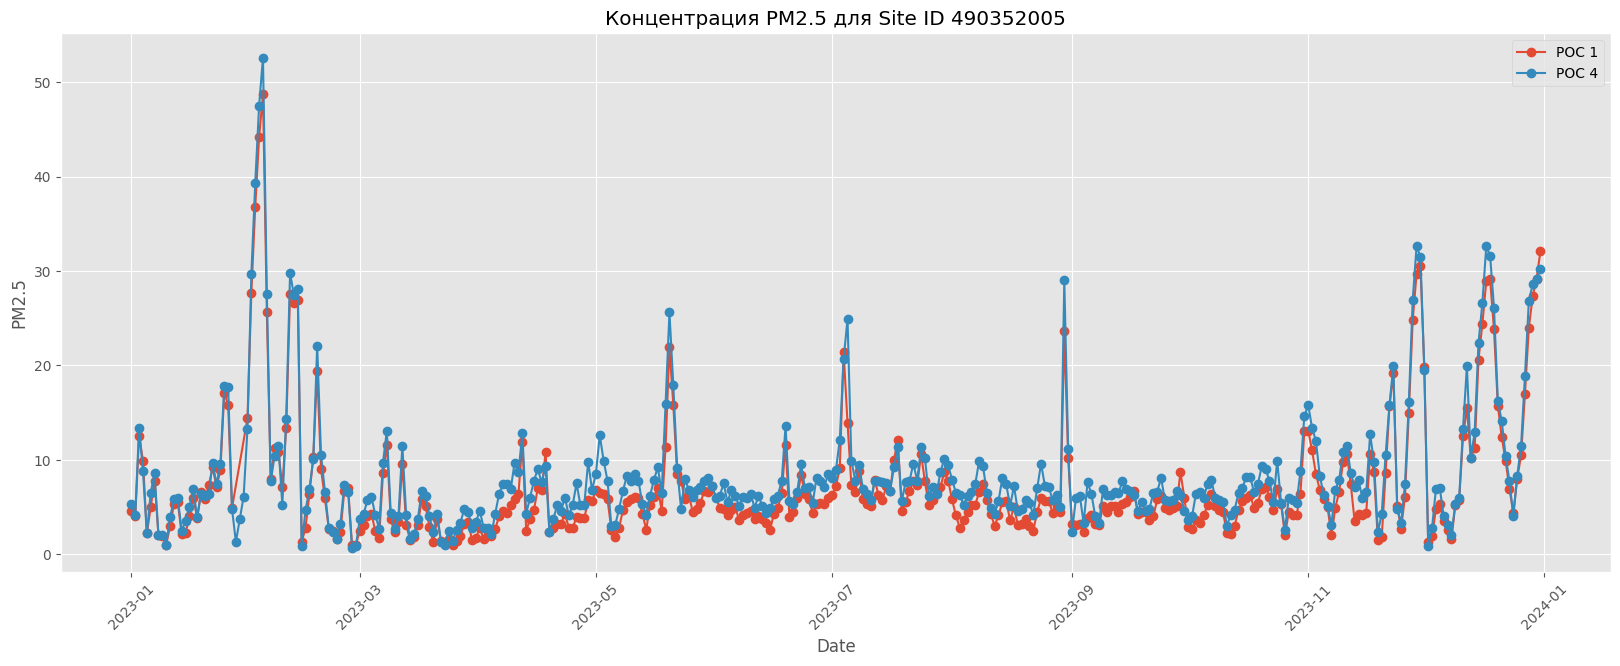

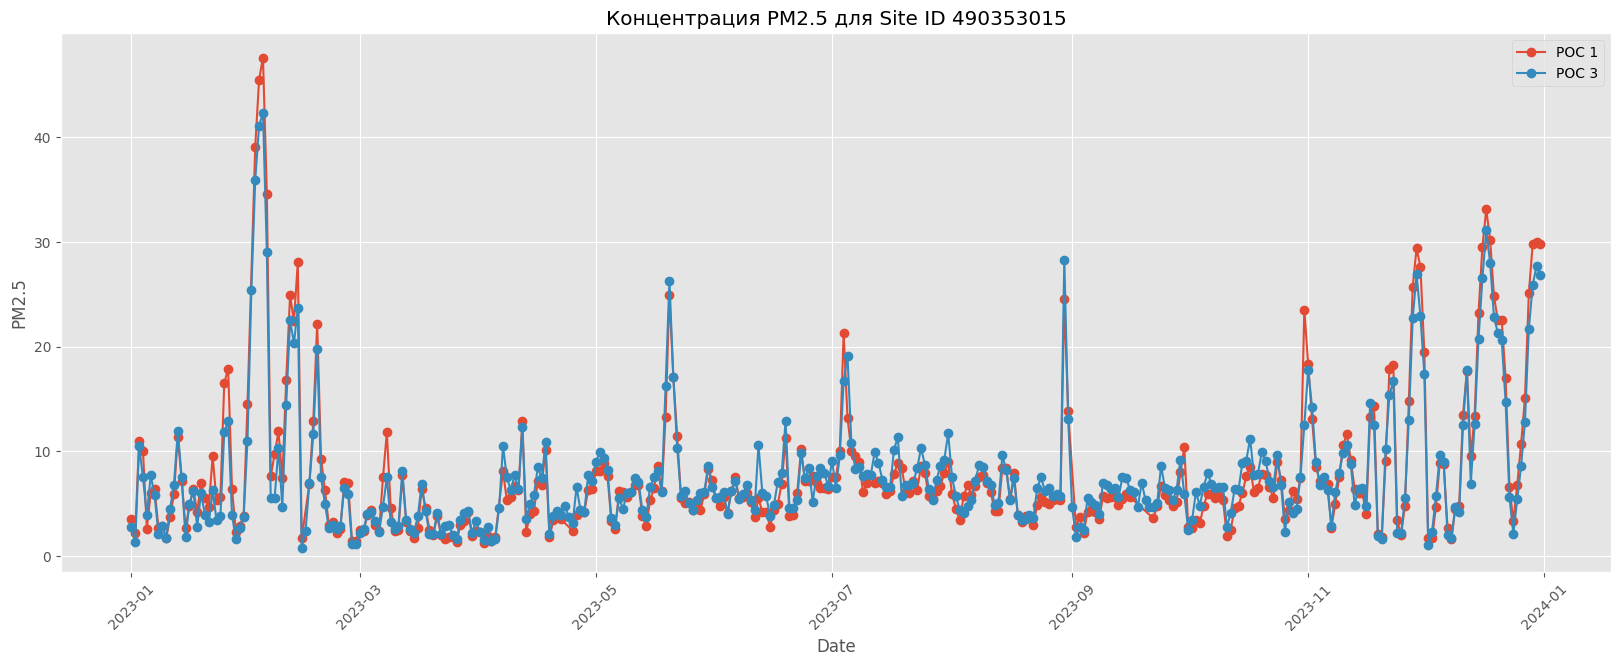

In [ ]:
site1_data = df1_2[df1_2['Site ID'] == 490352005]
site2_data = df1_2[df1_2['Site ID'] == 490353015]

plt.figure(figsize=(20, 7))

# График для Site ID == 490352005
for poc in site1_data['POC'].unique():
    data_subset = site1_data[site1_data['POC'] == poc]
    plt.plot(data_subset['Date'], data_subset['Daily Mean PM2.5 Concentration'], marker='o', label=f'POC {poc}')

plt.title('Концентрация PM2.5 для Site ID 490352005')
plt.xlabel('Date')
plt.ylabel('PM2.5')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

plt.figure(figsize=(20, 7))

# График для Site ID == 490353015
for poc in site2_data['POC'].unique():
    data_subset = site2_data[site2_data['POC'] == poc]
    plt.plot(data_subset['Date'], data_subset['Daily Mean PM2.5 Concentration'], marker='o', label=f'POC {poc}')

plt.title('Концентрация PM2.5 для Site ID 490353015')
plt.xlabel('Date')
plt.ylabel('PM2.5')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### Задача 3.1.4. Постройте скользящее среднее

Постройте график с дневным значением AQI и скользящим средним для дневного значения AQI. Используйте дневное значение AQI, усредненное по сайтам и POC. Поэкспериментируйте с разными временными диапазонами, чтобы найти наиболее подходящее.

*Подсказка:* Используйте `rolling()`.

In [ ]:
df2 = df1.groupby(['Date', 'POC', 'Site ID']).agg({'DAILY_AQI_VALUE': ['mean']}).reset_index()
df2.head(10)

,Date,POC,Site ID,DAILY_AQI_VALUE
,,,,mean
0,2023-01-01,1,490352005,19.0
1,2023-01-01,1,490353015,15.0
2,2023-01-01,3,490353015,12.0
3,2023-01-01,4,490352005,22.0
4,2023-01-02,1,490352005,17.0
5,2023-01-02,1,490353015,9.0
6,2023-01-02,3,490353015,5.0
7,2023-01-02,4,490352005,17.0
8,2023-01-03,1,490352005,52.0


In [ ]:
df2.nunique()

Date                     365
POC                        3
Site ID                    2
DAILY_AQI_VALUE  mean    104
dtype: int64

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1443 entries, 0 to 1442
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   (Date, )                 1443 non-null   datetime64[ns]
 1   (POC, )                  1443 non-null   int64         
 2   (Site ID, )              1443 non-null   int64         
 3   (DAILY_AQI_VALUE, mean)  1443 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 45.2 KB


In [30]:
import plotly.graph_objects as go

## Часть 3.2. A/B-тестирование

Сначала прочитайте статью WIRED об A/B-тестировании [здесь] (http://www.wired.com/2012/04/ff_abtesting/).

Предположим, ваша компания разрабатывает новый логотип. Художественный отдел разрабатывает два логотипа: ‘Logo A’ и ‘Logo B’, показанные ниже.
![](http://www.wired.com/wiredenterprise/wp-content/gallery/20-05/ff_abtesting_f.jpg)

Ваша задача — выяснить, какой логотип лучше.


Вы решаете провести следующий эксперимент. Вы используете рекламу Google, чтобы купить 6000 рекламных объявлений. В $N_A=3000$ объявлений (выбранных случайно) вы используете логотип А, а в остальных $N_B=3000$ объявлениях вы используете логотип Б. Затем вы видите, какой логотип привлекает больше кликов.

Оказывается, $n_A=800$ зрителей с логотипом A нажимают на рекламу, а $n_B=1000$ зрителей с логотипом B нажимают на рекламу. Очевидно, что логотип B показал лучшие результаты в этом тесте, но достаточно ли разница, чтобы сказать, что логотип B лучше? Или, возможно, ‘Logo B’ просто повезло в этом тесте?

Целью этого упражнения будет проведение двухпропорционального z-теста, чтобы определить, лучше ли ‘Logo B’. Шаги будут аналогичны шагам, использованным в эксперименте Солка с полиовакциной в 1954 году (1954 Salk polio-vaccine experiment).


### Задача 3.2.1. Сформулируйте нулевую гипотезу

Пусть $p_A = n_A/N_A$ — доля кликов по логотипу A, и аналогично $p_B$ — доля кликов по логотипу B. В терминах $p_A$ и $p_B$ четко сформулируйте нулевую и альтернативную гипотезы.



**Ваше решение:**

### **Нулевая гипотеза**: pA <= pB, т.е. реклама с логотипом Б показала худший результат по сравнению с рекламой с логотипом А
### **Альтернативная гипотеза**: pA > pB, т.е. реклама с лого Б была эффективнее

### Задача 2.2. Найдите двухпропорциональное z-значение

Предполагая нулевую гипотезу, мы знаем, что статистика, называемая *двухпропорциональным z-значением*,
$$
Z = \frac{p_A - p_B}{\sqrt{\hat{p} \hat{q} \left( \frac{1}{N_A} + \frac{1}{N_B} \right)}}.
$$
приблизительно распределяется в соответствии со стандартным нормальным распределением. Здесь $\hat{p} = \frac{N_A}{N_A + N_B}p_A + \frac{N_B}{N_A + N_B}p_B$ и $\hat{q} = 1-\hat{p}$.


Найдите двухпропорциональное z-значение.

In [35]:
n = 3000
nA = 800
nB = 1000
pA = nA/n
pB = nB/n
print('pA = ', pA)
print('pB = ', pB)

pA =  0.26666666666666666
pB =  0.3333333333333333


In [36]:
pw = (n/(n+n)*pA)+(n/(n+n)*pB)
print(pw)

0.3


In [37]:
qw= 1-pw
print(qw)

0.7


In [38]:
Z = (pA-pB)/(np.sqrt(pw*qw*(1/n+1/n)))
print(Z)

-5.6343616981901095


In [ ]:
from statsmodels.stats.proportion import proportions_ztest
counts = [110, 33]
sample_sizes = [201229, 200745]
z, pval = proportions_ztest(counts, sample_sizes,alternative='larger')
#alternative: 'two-sided', 'smaller', or 'larger'
print(z, pval)

Уровень значимости a = 0.05

### Задача 2.3. Завершите z-тест двух пропорций

Найдите значение $p$ для проверки гипотезы. Сначала, используя обычную функцию `cdf`, а затем проверьте свой ответ, запустив z-тест двух пропорций в Python с помощью  `proportions_ztest`.

In [39]:
import scipy.stats as stats
p = stats.norm.cdf((pB - pA) / ((pA * (1 - pA) / n + pB * (1 - pB) / n) ** 0.5))
print(p)

0.9999999919461322


In [40]:
from statsmodels.stats.proportion import proportions_ztest

count = np.array([nA, nB])
nobs = np.array([n, n])
z_stat, p_value = proportions_ztest(count, nobs, alternative='two-sided')

print(f"Z статистика: {z_stat}")
print(f"P-значение: {p_value}")

if p_value < 0.05:
    print("Отклоняем нулевую гипотезу")
else:
    print("Принимаем нулевую гипотезу")

Z статистика: -5.6343616981901095
P-значение: 1.7570790152024724e-08
Отклоняем нулевую гипотезу


P значение меньше уровня значимости a, поэтому мы отклоняем нулевую гипотезу и говорим о том, что реклама с логотипом B была эффективнее.
